In [164]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
base_file_loc = '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'
base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel'
# base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_optimized_v0_240909_roe_Dptag_CFT_nontag'

In [124]:
!ls /share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel

MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel_ccbar.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel_charged.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel_ddbar.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel_mixed.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel_ssbar.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel_taupair.root
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel_uubar.root
topo


In [125]:
# generic_ccbar = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00*.root'

generic_ccbar = base_file_loc + '/*ccbar.root'

# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + '/*uubar.root'
generic_ddbar = base_file_loc + '/*ddbar.root'
generic_ssbar = base_file_loc + '/*ssbar.root'
generic_charged = base_file_loc + '/*charged.root'
generic_mixed = base_file_loc + '/*mixed.root'
generic_taupair = base_file_loc + '/*taupair.root'

In [126]:
base_filter=' Dp_M>0'
# base_filter='etapip_gg_rank==1'
# base_filter+= '  && bdt>0.4'

# base_filter += ' && ((etapip_gamma1_clusterReg==1 && etapip_gamma1_E>0.05) || (etapip_gamma1_clusterReg==3 && etapip_gamma1_E>0.075) || (etapip_gamma1_clusterReg==2 && etapip_gamma1_E>0.05))'
# base_filter += ' && ((etapip_gamma2_clusterReg==1 && etapip_gamma2_E>0.05) || (etapip_gamma2_clusterReg==3 && etapip_gamma2_E>0.075) || (etapip_gamma2_clusterReg==2 && etapip_gamma2_E>0.05))'
# base_filter += ' && Pip_pionID > 0.6'
# base_filter += ' && etapip_Eta_p > 0.8'
# base_filter += ' && etapip_Eta_M > 0.52'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
# base_filter += ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# base_filter += ' && dM_pi0_75MeV>0.011 && dM_pi0_75MeV_2>0.011 && Dp_CMS_p>3'

# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'



# base_filter += " && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && \
#                 etapip_Eta_M>0.535 && \
#                 abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 && eta_Pi0_daughterAngle_0_1<1.4 && eta_Pi0_M>0.12 && \
#                 etapip_Eta_p>0.8 && etapip_pi0_gamma1_p>0.075 && etapip_pi0_gamma2_p>0.075 && Dp_CMS_p>3 && \
#                 Pih_pionID>0.6 && eta_Pip_pionID>0.6 && eta_Pim_pionID>0.6"

# 0.523598
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '


In [127]:
tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1","eta_Pi0_Easym",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz','Pip_p','Pip_pt','num_Dstar_no_nan']

In [128]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [151]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [152]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

5903408
7804050
0.7564544050845394


In [153]:
cut = 'Dp_M>0.0'
# cut += '& Dp_M>1.80 & Dp_M<1.94'
# cut = 'bdt>0.4'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [154]:
# Extract the directory from the file path
plot_directory = "/share/storage/jykim/storage_b2/storage/PLOTS/mc15ri_generic/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_non_tag/cut_study"
# plot_directory = "/share/storage/jykim/storage_b2/storage/PLOTS/mc15ri_generic/MC15ri_etaetapip_optimized_v0_240909_roe_Dptag_CFT_nontag/cut_study"

# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [155]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"
xrange = (1.6,2.1)
nbins=50
img_path=''
xlabel=''

In [156]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",force_range=tuple(),unit="[GeV/c^2]" ):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range,save_repo=img_path)
    plt.tight_layout()

    # plt.savefig(img_path)

In [157]:
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

[100966.  99608.  98345.  97313.  96376.  95485.  94771.  93306.  92225.
  91888.  90764.  90003.  88471.  87197.  85909.  84193.  83491.  82019.
  80905.  80418.  78863.  77929.  76921.  75545.  74621.  74155.  73079.
  72089.  71552.  71531.  70547.  72215.  75464.  79867.  77897.  71284.
  67199.  65592.  65299.  64201.  63708.  63566.  62654.  61958.  61937.
  61137.  61076.  60345.  60229.  60506.  62266.  67461.  78915.  88827.
  80082.  65731.  59046.  56808.  55754.  54596.  54474.  53787.  53467.
  53299.  52609.  52415.  52176.  51368.  51158.  51300.]
fitst_bin_entries=100966.0


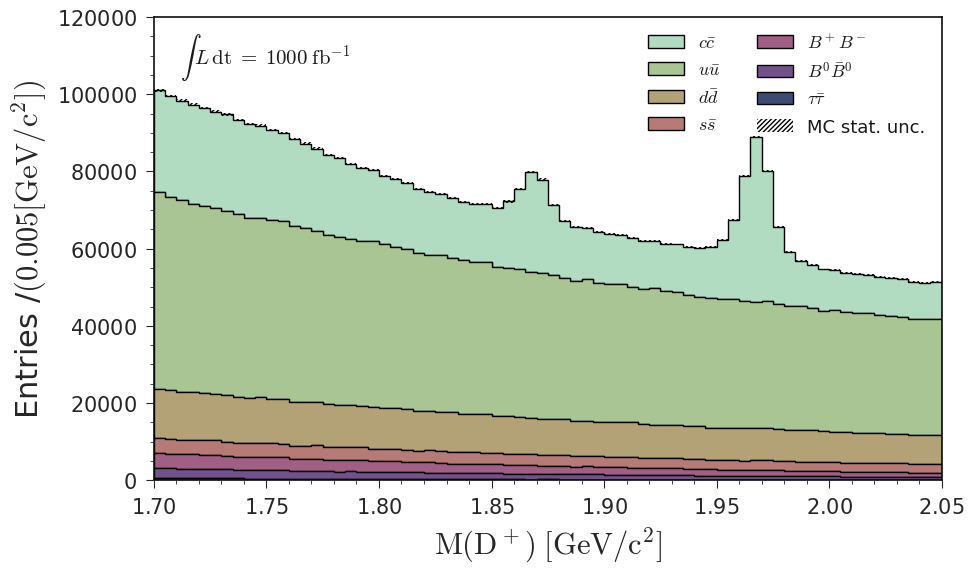

In [158]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.67,2.1)
xrange = (1.7,2.05)

nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_pipipi_loose_v0_all.png"

# img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)
# plt.ylim(0,90000)
# plt.savefig(img_path)


[7.210397e+06 0.000000e+00 4.689800e+05 9.688600e+04 2.085500e+04
 5.023000e+03 1.328000e+03 4.200000e+02 9.400000e+01 4.500000e+01
 1.900000e+01]
fitst_bin_entries=7210397.0


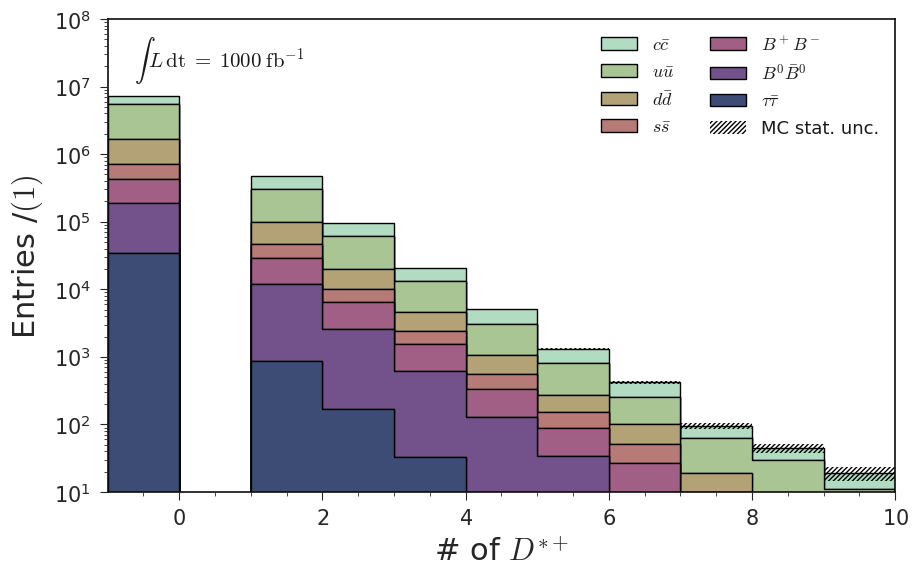

In [159]:
var = 'num_Dstar_no_nan'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
# data = [pd_taupair[var if var != -1 else 0], 
#        pd_mixed[var if var != -1 else 0], 
#        pd_charged[var if var != -1 else 0], 
#        pd_ssbar[var if var != -1 else 0], 
#        pd_ddbar[var if var != -1 else 0], 
#        pd_uubar[var if var != -1 else 0], 
#        pd_ccbar[var if var != -1 else 0]]


xrange = (1.67,2.1)
xrange = (-1,10)
nbins = 11
xlabel = r"# of $D^{*+}$"
unit = ""

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_pipipi_loose_v0_all_num_Dstar_no_nan.png"

img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",unit=unit)
# plt.ylim(0,90000)
plt.yscale("log")
# plt.tight_layout()
# plt.savefig(img_path)


In [160]:
cut = 'Dp_M>0.0'
cut += ' & num_Dstar_no_nan>0'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[7351. 7386. 7187. 7101. 7016. 7013. 7035. 6804. 6873. 6733. 6596. 6685.
 6378. 6430. 6690. 6407. 6289. 6279. 6339. 6349. 6044. 5994. 5948. 5820.
 5751. 5829. 5746. 5528. 5708. 5544. 5641. 6034. 6923. 8316. 7871. 6312.
 5406. 5176. 5226. 5003. 5013. 4955. 4970. 5068. 4901. 4839. 4793. 4731.
 4867. 4692. 4890. 5145. 5524. 6120. 5671. 5008. 4595. 4451. 4485. 4389.
 4381. 4403. 4435. 4339. 4208. 4285. 4276. 4167. 4177. 4195.]
fitst_bin_entries=7351.0


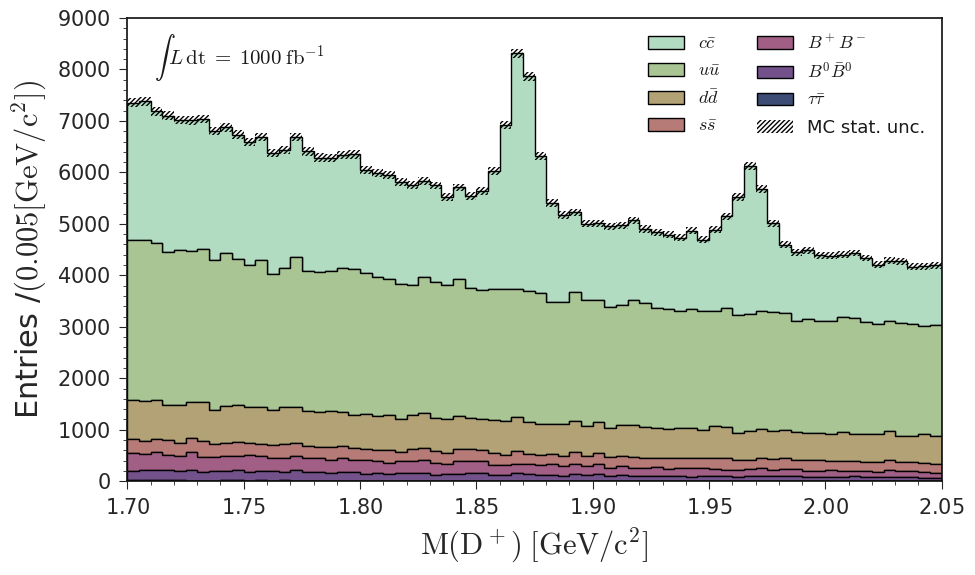

In [161]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.7,2.05)
nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step1.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_step1_Dstartag.png"
img_path = plot_directory + "/MC15ri_Dpetapip_pipipi_loose_v0_Dstar_yes_tag.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipipi_optimized_v0_nontag.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [162]:
cut = 'Dp_M>0.0'
cut += ' & eta_Pi0_daughterAngle_0_1<1.4 & abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[3782. 3873. 3763. 3626. 3609. 3635. 3648. 3425. 3527. 3483. 3455. 3485.
 3299. 3322. 3459. 3270. 3270. 3208. 3269. 3332. 3092. 2998. 2969. 2980.
 2920. 2907. 2920. 2739. 2848. 2815. 2884. 3259. 4167. 5432. 5018. 3654.
 2833. 2600. 2575. 2469. 2440. 2403. 2490. 2520. 2478. 2398. 2393. 2290.
 2454. 2361. 2499. 2709. 3106. 3694. 3284. 2708. 2268. 2170. 2229. 2130.
 2182. 2132. 2172. 2130. 2041. 2135. 2036. 1978. 2032. 2043.]
fitst_bin_entries=3782.0


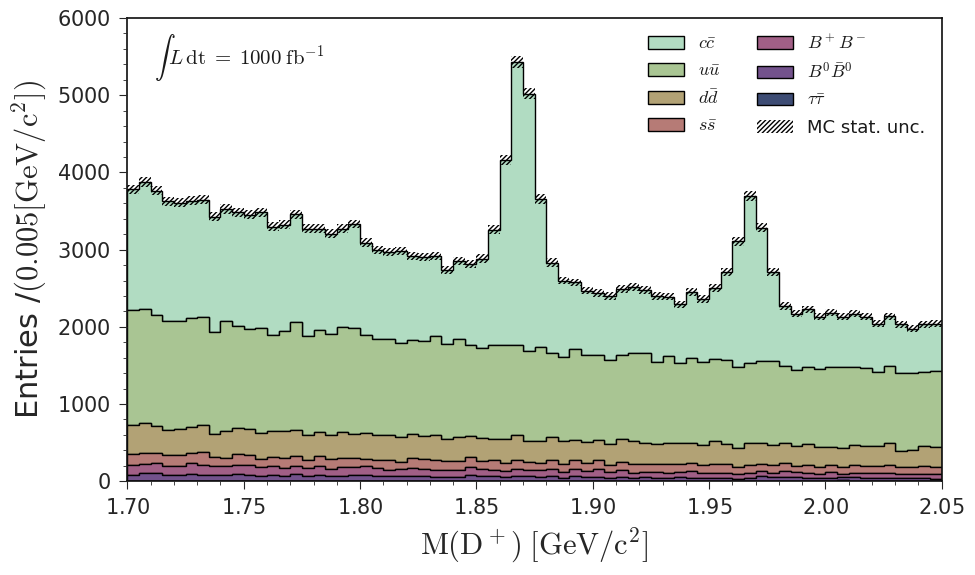

In [163]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.7,2.05)
nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step1.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_step1_Dstartag.png"
img_path = plot_directory + "/MC15ri_Dpetapip_pipipi_loose_v0_step2_Dstar_yes_tag_eta_angle_cuts.png"

# img_path = plot_directory + "/test.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipipi_loose_v0_pi0_angle_cuts.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[307923.  29216.  15193.   9996.   7211.   5665.   4686.   3977.   3323.
   2943.   2613.   2347.   2080.   1943.   1883.   1647.   1583.   1500.
   1433.   1337.   1296.   1286.   1180.   1116.   1148.   1123.   1059.
   1101.   1021.   1006.    981.    937.    993.   1028.   1006.   1016.
    964.    985.    963.   1020.   1035.   1047.   1055.   1064.   1105.
   1171.   1148.   1216.   1248.   1251.   1406.   1412.   1481.   1593.
   1696.   1817.   1974.   2081.   2338.   2585.   2871.   3337.   4039.
   4732.   5761.   7428.  10324.  15927.  30356. 379603.]
fitst_bin_entries=307923.0


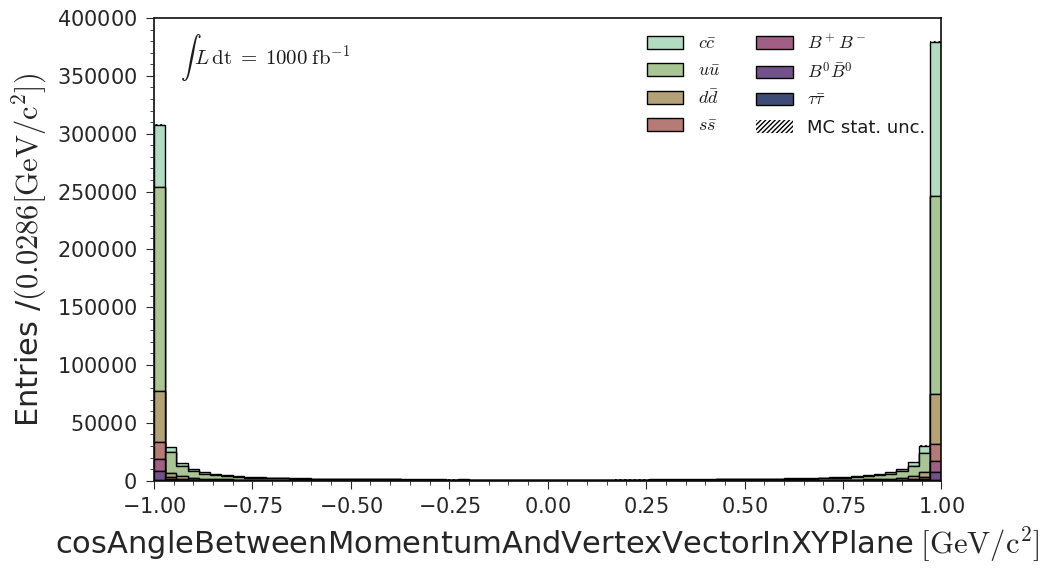

In [75]:
var = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (-1,1)
nbins = 70
xlabel = "cosAngleBetweenMomentumAndVertexVectorInXYPlane"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step1.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_step1_Dstartag.png"

img_path = plot_directory + "/test.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipipi_loose_v0_pi0_angle_cuts.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

## FOM

In [76]:
pd_ccbar_bkg = pd_ccbar.query('Dp_isSignal!=1')
pd_all = pd.concat([pd_ccbar_bkg,
                    pd_uubar,
                    pd_ddbar,
                    pd_ssbar,
                    pd_charged,
                    pd_mixed,
                    pd_taupair], ignore_index=True)

# pd_all = pd_ccbar

In [77]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [78]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [79]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [80]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    # par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    # par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    # p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    # lns = [p1, p2, p3]
    lns = [p1, p2]

    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    # par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^+ \to \eta_{\gamma\gamma} \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [81]:
def calculate_FOM_3D(bkg_pd, sig_pd, grid_list, scale_factor, cut_x, cut_y, cut_z):
 
    FOM_list = list()
    
    for points_3d in grid_list:
        
        points_3d_x, points_3d_y, points_3d_z =  points_3d[0], points_3d[1], points_3d[2]
    
        temp_cut = cut_x + str(points_3d_x) + ' & ' +  cut_y + str(points_3d_y) + ' & ' + cut_z + str(points_3d_z) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)    
        
        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)
        # print(str(scale_factor*nsig + nbkg) + ' nsig=' + str(nsig) + ', nbkg=' + str(nbkg) + ', cut=' + temp_cut )
#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM_list.append(FOM)    
        
    return FOM_list

In [82]:
# # sigMC_file_loc = base_file_loc + 'topo/resultfile/result_phi/standard.root'
# sigMC_file_loc = base_file_loc + '/*ccbar.root'

# base_filter=' num_Dstar_no_nan>0 && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 && etapip_Eta_daughterAngle_0_1<1.7'
# # base_filter += '&& nSigCascDcyBr_0==1'
# base_filter += '&& Dp_isSignal==1'
# # base_filter+='&& abs(D0_cosHel_0)<0.8'

# # base_filter += '&& gamma_E>0.48'

# # variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
# tree='etapip_gg'

pd_ccbar_signal = pd_ccbar.query('Dp_isSignal==1')

# pd_ccbar_signal = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_ccbar_signal))

29229


In [83]:
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
half_1_sigMC = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/240828_loose_v0_roe_Dptag/*.root'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.8 && D0_M<1.9'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# base_filter += '&& Dstarp_isSignal==1'

# # base_filter += '&& gamma_E>0.48'

base_filter = 'num_Dstar_no_nan<0 && eta_Pi0_daughterAngle_0_1<1.4 && abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 & Dp_isSignal==1'
base_filter += ' && Dp_M>1.80 && Dp_M<1.94'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


# pd_half_1_sigMC = pd_ccbar_signal

scale_factor = len(pd_ccbar_signal)/len(pd_half_1_sigMC)
print(scale_factor)

0.46703630320848777


In [84]:
list(pd_ccbar)

['__experiment__',
 '__run__',
 '__event__',
 'Dp_M',
 'Dp_isSignal',
 'Dp_CMS_p',
 'Dp_cosAngleBetweenMomentumAndVertexVector',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Dp_acos_cosAngleBetweenMomentumAndVertexVector',
 'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'etapip_Eta_M',
 'etapip_Eta_isSignal',
 'etapip_Eta_p',
 'etapip_pi0_gamma1_p',
 'etapip_pi0_gamma2_p',
 'etapip_pi0_gamma1_clusterNHits',
 'etapip_pi0_gamma2_clusterNHits',
 'etapip_pi0_gamma1_clusterReg',
 'etapip_pi0_gamma2_clusterReg',
 'eta_Pi0_M',
 'eta_Pi0_daughterAngle_0_1',
 'eta_Pi0_daughterDiffOfPhi_0_1',
 'eta_Pi0_Easym',
 'eta_Pip_pionID',
 'eta_Pim_pionID',
 'eta_Pip_pionIDNN',
 'eta_Pim_pionIDNN',
 'eta_Pip_mcPDG',
 'eta_Pim_mcPDG',
 'Pip_pionID',
 'Pip_pionIDNN',
 'Pip_mcPDG',
 'Pip_dr',
 'Pip_dz',
 'Pip_p',
 'Pip_pt',
 'num_Dstar_no_nan']

In [85]:
X, Y, Z = np.mgrid[0.99950:0.99999:50j, 0.4:1.4:101j, 0.4:0.8:41j]
a = zip(X.ravel(), Y.ravel(), Z.ravel())
A_list = list(a)

grid_list = A_list
cut_x = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane > '
cut_y = 'etapip_Eta_p > '
cut_z = 'Pip_p > '

scale_factor=scale_factor

FOM_phig_list = calculate_FOM_3D(pd_all,pd_half_1_sigMC, grid_list ,scale_factor, cut_x,  cut_y, cut_z )


In [ ]:
# # Number to be equally divided
# number_to_divide = 2

# # Update each element in the list
# for i in range(len(FOM_phig_list)):
#     FOM_phig_list[i] = FOM_phig_list[i]/number_to_divide


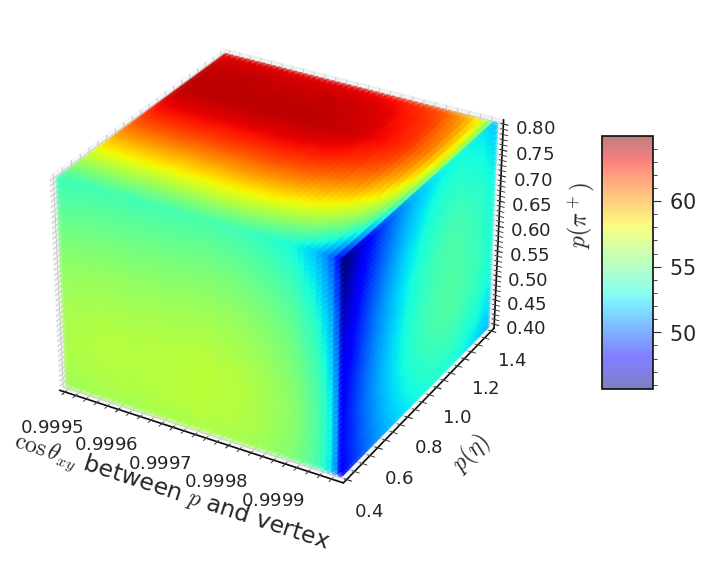

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5, cmap = 'jet')
# scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5)

fig.colorbar(scat, shrink=0.5, aspect=5 , pad = 0.1)

ax.set_xlabel(r'$\cos \theta_{xy}$ between $p$ and vertex',fontsize=17)
#ax.set_ylabel(r'Second FBDT cut',fontsize=17)
ax.set_ylabel(r'$p(\eta)$',fontsize=17)
ax.set_zlabel(r'$p(\pi^+)$',fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=13)

# Set axis ranges to their full extent
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())


# ax.ticklabel_format(axis = 'z',  style='sci', scilimits = (0,1))
# ax.dist = 10
ax.xaxis.labelpad=8
ax.yaxis.labelpad=12
ax.zaxis.labelpad=15.5


plt.tight_layout()
plt.savefig('FOM_MC15ri_3d_20240909_SR_nontag.png')
plt.show()

In [37]:
#yes tag

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=51.9088956793043, cut value=(0.9995, 0.98, 0.49)


In [88]:
#non tag

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=64.96326295113275, cut value=(0.9996700000000001, 1.1099999999999999, 0.61)


max=16.455458211096257, cut value=0.9899999999999999


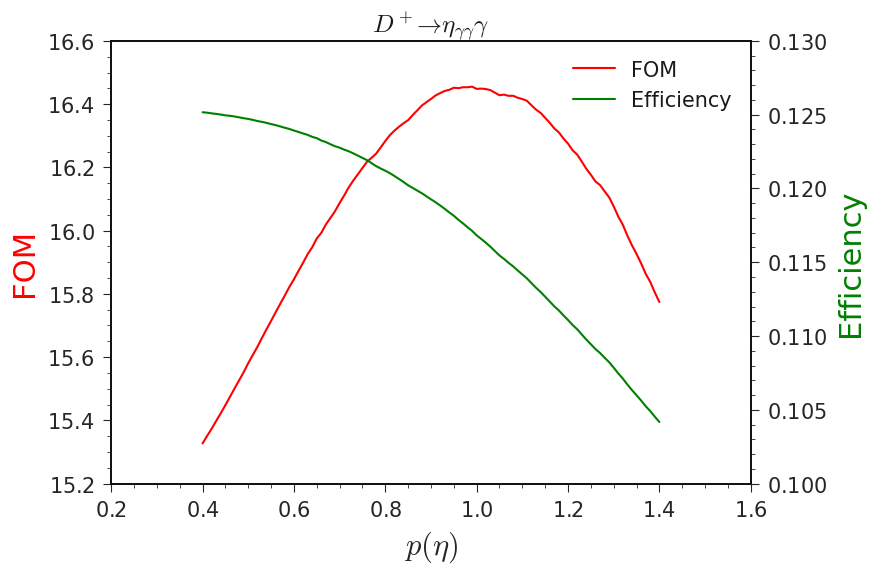

In [70]:
FOM_cut_list = np.linspace(0.4,1.4,101)
cut = 'etapip_Eta_p > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r'$p(\eta)$',offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")
plt.savefig('FOM_MC15ri_1d_Etap_20240909_SR_nontag.png')


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=16.510455148322247, cut value=0.55


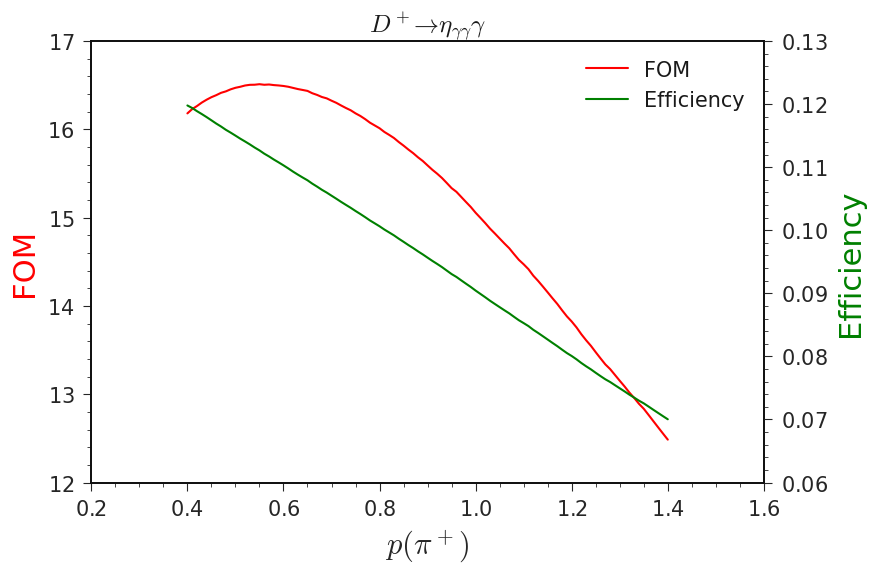

In [71]:
FOM_cut_list = np.linspace(0.4,1.4,101)
cut = 'Pip_p > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r'$p(\pi^+)$',offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")
plt.savefig('FOM_MC15ri_1d_Pipp_20240909_SR_nontag.png')


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=27.705586406770376, cut value=0.99976


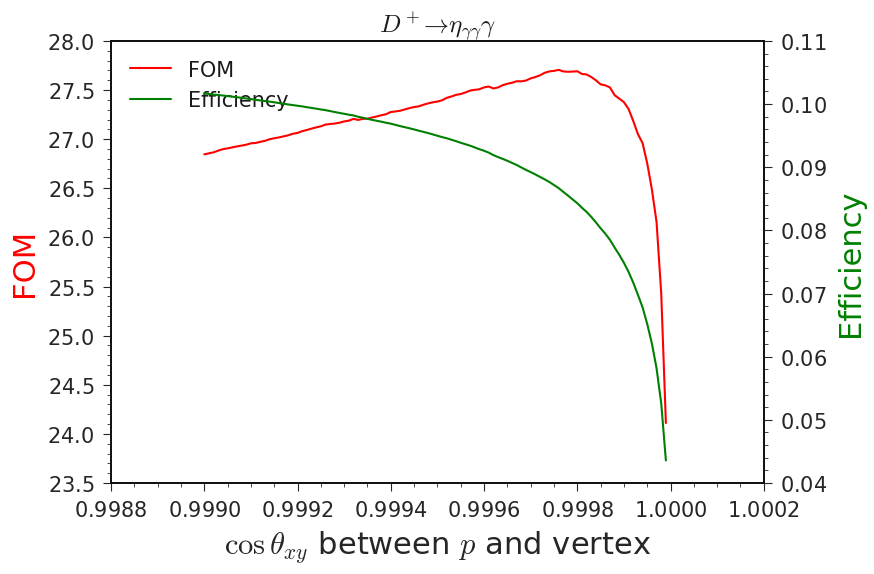

In [62]:
# FOM_cut_list = np.linspace(0.99950,0.99999,49*2+1)
FOM_cut_list = np.linspace(0.999,0.99999,100)

cut = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r'$\cos \theta_{xy}$ between $p$ and vertex',offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")

plt.savefig('FOM_MC15ri_1d_cosXY_20240909_SR_nontag.png')

print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))